In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import cm
%run -i ncbx_funcs.py
veg_file = 'dorian_grdsub9_iniveg.nc'
init_file = 'NCoreBanks_sub9_chrisbathy.nc'

ds = xr.open_dataset(veg_file)
ds

<xarray.Dataset> Size: 520MB
Dimensions:           (time: 1, sc_r: 5, sc_w: 6, erho: 1017, xrho: 1317,
                       eu: 1017, xu: 1316, ev: 1016, xv: 1317, Nbed: 1, Nveg: 3)
Coordinates:
  * sc_r              (sc_r) float64 40B -0.9 -0.7 -0.5 -0.3 -0.1
  * sc_w              (sc_w) float64 48B -1.0 -0.8 -0.6 -0.4 -0.2 0.0
Dimensions without coordinates: time, erho, xrho, eu, xu, ev, xv, Nbed, Nveg
Data variables: (12/40)
    spherical         (time) int16 2B ...
    Vtransform        (time) int32 4B ...
    Vstretching       (time) int32 4B ...
    theta_b           (time) float64 8B ...
    theta_s           (time) float64 8B ...
    Tcline            (time) float64 8B ...
    ...                ...
    dmix_time         (time, erho, xrho) timedelta64[ns] 11MB ...
    plant_height      (time, Nveg, erho, xrho) float64 32MB ...
    plant_density     (time, Nveg, erho, xrho) float64 32MB ...
    plant_diameter    (time, Nveg, erho, xrho) float64 32MB ...
    plant_thickness   (time, Nveg, erho, xrho) float64 32MB ...
    marsh_mask        (time, Nveg, erho, xrho) float64 32MB ...
Attributes:
    history:  Created by updatclim on 25-Apr-2022 10:51:03
    type:     initial forcing file from http://hycom.coaps.fsu.edu:8080/thred...

In [2]:
# read in the bathy file which has x and y
ds_init = xr.open_dataset(init_file)
x = ds_init.xi_rho
y = ds_init.eta_rho
h = ds_init.h

# make a mask with 1 on land and -1 in water
hmask = np.ones_like(h)
hmask[h>=0.] = -1.

plant_density = np.sum( np.squeeze( ds.plant_density[0,:,:,:] ), axis = 0)
plant_height = np.sum( np.squeeze( ds.plant_height[0,:,:,:] ), axis = 0)
plant_thickness = np.sum( np.squeeze( ds.plant_thickness[0,:,:,:] ), axis = 0)
plant_diameter = np.sum( np.squeeze( ds.plant_diameter[0,:,:,:] ), axis = 0)
# marsh_mask = np.squeeze( ds.marsh_mask[0,:,:,:] ) # marsh mask is all zeros

print('Shape of x, and veg:')
print(np.shape(x))
print(np.shape(plant_density))
print('plant_density values: ',np.unique( plant_density ) )
print('plant_height values: ',np.unique( plant_height ) )
print('plant_thickness values: ',np.unique( plant_thickness ) )
print('plant_diameter values: ',np.unique( plant_diameter ) )

Shape of x, and veg:
(1317,)
(1017, 1317)
plant_density values:  [ 0.  1. 10.]
plant_height values:  [0.  0.5 2. ]
plant_thickness values:  [0.    0.005]
plant_diameter values:  [0.   0.03]


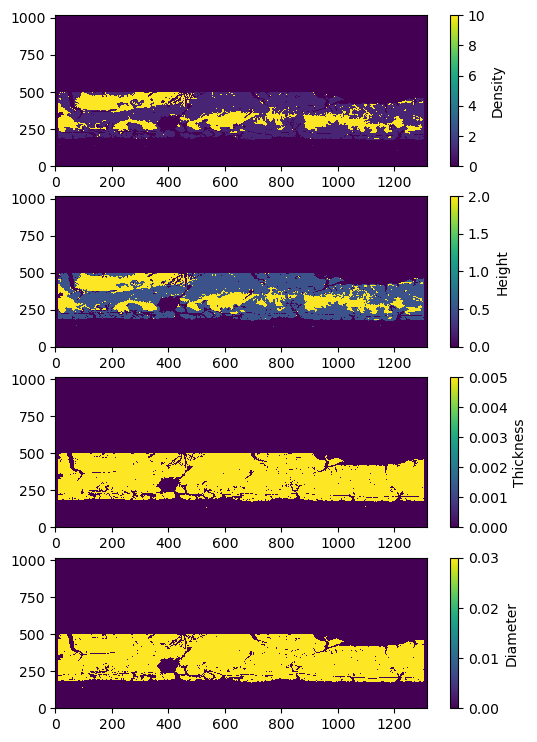

In [3]:
fig, ax = plt.subplots(4,1, figsize=(6,9))
m0 = ax[0].pcolormesh(x, y, plant_density, shading = 'nearest' )
fig.colorbar(m0, ax=ax[0], label='Density')
m1 = ax[1].pcolormesh(x, y, plant_height, shading = 'nearest' )
fig.colorbar(m1, ax=ax[1], label='Height')
m2 = ax[2].pcolormesh(x, y, plant_thickness, shading = 'nearest' )
fig.colorbar(m2, ax=ax[2], label='Thickness')
m3 = ax[3].pcolormesh(x, y, plant_diameter, shading = 'nearest' )
fig.colorbar(m3, ax=ax[3], label='Diameter')

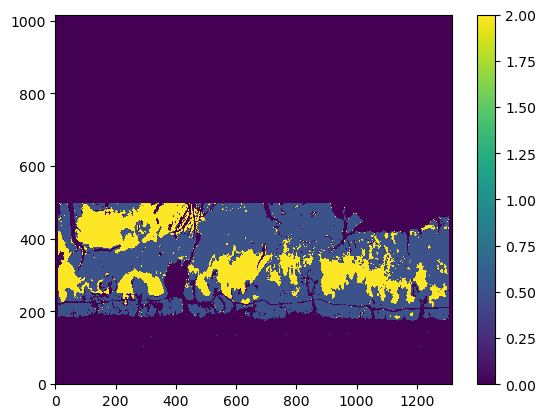

In [4]:
m0 = plt.pcolormesh(x, y, plant_height, shading = 'nearest' )
plt.colorbar()

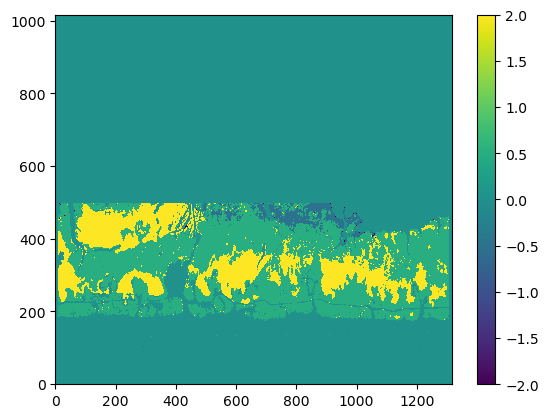

In [5]:
m0 = plt.pcolormesh(x, y, hmask*plant_height, shading = 'nearest' )
plt.colorbar()

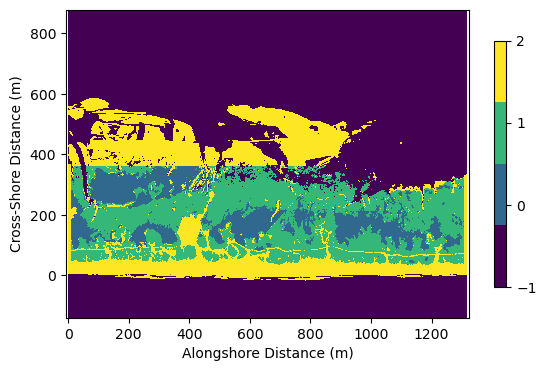

In [6]:
labels = np.ones_like(h)
labels[plant_height == 0.0] = 2 # sand
labels[plant_height == 0.5] = 1 # grassy
labels[plant_height == 2.0] = 0 # woody
labels[h>=0.] = -1.

cmap = plt.get_cmap('viridis', 4)
fig, ax = plt.subplots(1,1, figsize=(6.5, 4) )
m1 = ax.pcolormesh(x, y-139, labels, shading = 'nearest', cmap = cmap )
ax.set_ylim([-100, 700])
plt.axis('equal')
ax.set_xlabel('Alongshore Distance (m)')
ax.set_ylabel('Cross-Shore Distance (m)')

fig.colorbar(m1, ticks = [-1, 0, 1, 2], shrink = .8  )
plt.savefig( 'labels_on_grid.png', dpi=200, bbox_inches='tight') 

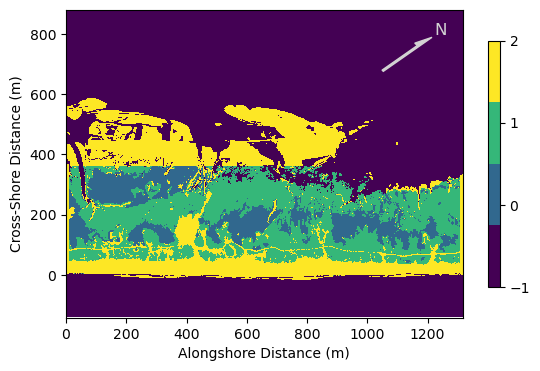

In [7]:

# north arrow calcs
# rot = 42
adx,ady = xycoord(.12, 90-42)

cmap = plt.get_cmap('viridis', 4)
fig, ax = plt.subplots(1,1, figsize=(6.4, 4) )
m1 = ax.pcolormesh(x, y-139, labels, shading = 'nearest', cmap = cmap )
ax.set_xlim( (0, 1200) )
ax.set_ylim([-100, 375])
plt.axis('equal')

# north arrow
ax.arrow( .8, .8,  adx, ady, shape = 'right', width=.01, color='lightgray', transform=ax.transAxes )
ax.text( .8+adx+.04, .8+ady+.04,'N',fontsize=12, color='lightgray', transform=ax.transAxes )

ax.set_xlabel('Alongshore Distance (m)')
ax.set_ylabel('Cross-Shore Distance (m)')
fig.colorbar(m1, ticks = [-1, 0, 1, 2], shrink = .8  )
plt.savefig( 'labels_on_grid2.png', dpi=200, bbox_inches='tight') 